In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [0]:
tf.enable_eager_execution()

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 128
EPOCHS = 200 
seed = tf.random.normal([8, 100])

In [0]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(-1, 28,28, 1)
train_images = train_images.astype(np.float32)
train_images = (train_images - 127.5) / 127.5
# train_images = tf.image.resize_images(train_images, [64, 64])
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class Discriminator(keras.Model):
    def __init__(self):
        super().__init__(name = "discriminator")
        self.conv1 = keras.layers.Conv2D(filters=128,kernel_size=(4,4),strides=2,padding='same',kernel_initializer=keras.initializers.random_normal(mean=0.0, stddev=0.02))
        self.leaky_1 = keras.layers.LeakyReLU(alpha = 0.2)
        self.conv2 = keras.layers.Conv2D(filters=256,kernel_size=(4,4),strides=2,padding='same')
        self.BN1 = keras.layers.BatchNormalization()
        self.leaky_2 = keras.layers.LeakyReLU(alpha = 0.2)
        self.flatten = keras.layers.Flatten()
        self.Dense = keras.layers.Dense(units = 256)
        self.BN2 = keras.layers.BatchNormalization()
        self.leaky_3 = keras.layers.LeakyReLU(alpha = 0.2)
        self.logits = keras.layers.Dense(units = 1, activation='sigmoid')

        # self.conv1 = keras.layers.Conv2D(filters=128,kernel_size=(4,4),strides=2,padding='same',kernel_initializer=keras.initializers.random_normal(mean=0.0, stddev=0.02))
        # self.leaky_1 =  keras.layers.LeakyReLU(alpha = 0.2)
        # self.conv2 = keras.layers.Conv2D(filters=256,kernel_size=(4,4),strides=2,padding='same')
        # self.BN2 = keras.layers.BatchNormalization()
        # self.leaky_2 = keras.layers.LeakyReLU(alpha = 0.2)
        # self.conv3 = keras.layers.Conv2D(filters=512,kernel_size=(4,4),strides=2,padding='same')
        # self.BN3 = keras.layers.BatchNormalization()
        # self.leaky_3 = keras.layers.LeakyReLU(alpha = 0.2)
        # self.conv4 = keras.layers.Conv2D(filters=1024,kernel_size=(4,4),strides=2,padding='same')
        # self.BN4 = keras.layers.BatchNormalization()
        # self.leaky_4 = keras.layers.LeakyReLU(alpha = 0.2)
        # self.flatten = keras.layers.Flatten()
        # self.Dense = keras.layers.Dense(units = 1024)
        # self.BN5 = keras.layers.BatchNormalization()
        # self.leaky_5 = keras.layers.LeakyReLU(alpha = 0.2)
        # self.logits = keras.layers.Dense(units = 1, activation='sigmoid')       

    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.leaky_1(x)
        x = self.conv2(x)
        x = self.BN1(x)
        x = self.leaky_2(x)
        x = self.flatten(x)
        x = self.Dense(x)
        x = self.BN2(x)
        x = self.leaky_3(x)
        x = self.logits(x)
        # x = self.conv1(input_tensor)
        # x = self.leaky_1(x)
        # x = self.conv2(x)
        # x = self.BN2(x)
        # x = self.leaky_2(x)
        # x = self.conv3(x)
        # x = self.BN3(x)
        # x = self.leaky_3(x)
        # x = self.conv4(x)
        # x = self.BN4(x)
        # x = self.leaky_4(x)
        # x = self.flatten(x)
        # x = self.Dense(x)
        # x = self.BN5(x)
        # x = self.leaky_5(x)
        # x = self.logits(x)
        return x


discriminator = Discriminator()

In [0]:
class Generator(keras.Model):
    
    def __init__(self):
        super().__init__(name='generator')
        self.input_layer = keras.layers.Dense(7*7*256)
        self.reshape = keras.layers.Reshape((7,7,256))
        self.BN1 = keras.layers.BatchNormalization()
        self.relu1 = keras.layers.ReLU()
        self.conv2dT1 = keras.layers.Conv2DTranspose(filters=128,kernel_size=(4,4),padding='same',strides=2,kernel_initializer=keras.initializers.random_normal(mean=0.0, stddev=0.02))
        self.BN2 = keras.layers.BatchNormalization()
        self.relu2 = keras.layers.ReLU()
        self.output_layer = keras.layers.Conv2DTranspose(filters=1,kernel_size=(4,4),strides=2,padding='same',activation = "tanh")
        # self.input_layer = keras.layers.Dense(4*4*1024)
        # self.reshape = keras.layers.Reshape((4,4,1024))
        # self.BN1 = keras.layers.BatchNormalization()
        # self.relu1 = keras.layers.ReLU()
        # self.conv2dT1 = keras.layers.Conv2DTranspose(filters=512,kernel_size=(4,4),strides=2,padding='same',kernel_initializer=keras.initializers.random_normal(mean=0.0, stddev=0.02))
        # self.BN2 = keras.layers.BatchNormalization()
        # self.relu2 = keras.layers.ReLU()
        # self.conv2dT2 = keras.layers.Conv2DTranspose(filters=256,kernel_size=(4,4),strides=2,padding='same')
        # self.BN3 = keras.layers.BatchNormalization()
        # self.relu3 = keras.layers.ReLU()
        # self.conv2dT3 = keras.layers.Conv2DTranspose(filters=128,kernel_size=(4,4),strides=2,padding='same')
        # self.BN4 = keras.layers.BatchNormalization()
        # self.relu4 = keras.layers.ReLU()
        # self.output_layer = keras.layers.Conv2DTranspose(filters=1,kernel_size=(4,4),strides=2,padding='same',activation = "tanh")

    def call(self, input_tensor):
        x = self.input_layer(input_tensor)
        x = self.reshape(x)
        x = self.BN1(x)
        x = self.relu1(x)
        x = self.conv2dT1(x)
        x = self.BN2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        # x = self.input_layer(input_tensor)
        # x = self.reshape(x)
        # x = self.BN1(x)
        # x = self.relu1(x)
        # x = self.conv2dT1(x)
        # x = self.BN2(x)
        # x = self.relu2(x)
        # x = self.conv2dT2(x)
        # x = self.BN3(x)
        # x = self.relu3(x)
        # x = self.conv2dT3(x)
        # x = self.BN4(x)
        # x = self.relu4(x)
        # x = self.output_layer(x)
        return x
    
    def generate_noise(self,batch_size, random_noise_size):
        return tf.random.normal([batch_size, random_noise_size])

generator = Generator()

In [0]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

def Discriminator_loss(real_output, fake_output,smoothing_factor = 0.9):
        real_loss = cross_entropy(tf.ones_like(real_output)*smoothing_factor, real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

def Generator_loss(fake_output):
    loss = cross_entropy(tf.ones_like(fake_output), fake_output)
    return loss

In [0]:
discriminator_optimizer = keras.optimizers.Adam(0.0002,0.5)
generator_optimizer = keras.optimizers.Adam(0.0002,0.5)

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [0]:
@tf.function()
def training(generator: Generator, discriminator: Discriminator, images:np.ndarray , k:int =1, batch_size = BATCH_SIZE):
    noise = generator.generate_noise(batch_size, 100)
    for _ in range(k):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(noise,training=True)

            real_output = discriminator(images,training=True)
            fake_output = discriminator(generated_images,training=True)

            gen_loss = Generator_loss(fake_output)
            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))


            disc_loss = Discriminator_loss(real_output, fake_output)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input,training=False)

    plt.figure(figsize=(10,10))

    for i in range(predictions.shape[0]):
        plt.subplot(1, 8, i+1) 
        plt.imshow(tf.reshape(predictions[i], shape = (28,28)), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
def train(dataset, epochs):
    for epoch in range(epochs+1):
        start = time.time()
        for image_batch in dataset:
            training(generator, discriminator, image_batch ,k = 1, batch_size=BATCH_SIZE)
        if (epoch % 10) == 0:
            print('Epoch:', str(epoch))
            print ('Time for epoch {} is {} sec'.format(epoch, time.time()-start))
            generate_and_save_images(generator,epoch,seed)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0
Time for epoch 0 is 48.32719945907593 sec


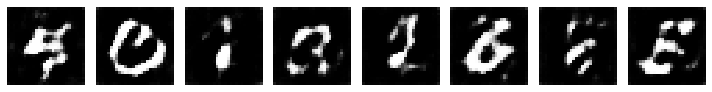

Epoch: 10
Time for epoch 10 is 38.864893674850464 sec


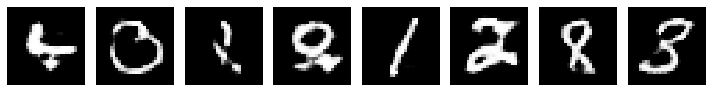

Epoch: 20
Time for epoch 20 is 38.71341323852539 sec


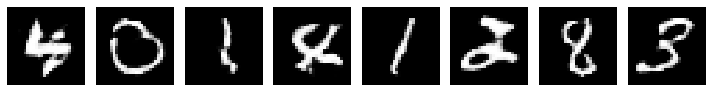

Epoch: 30
Time for epoch 30 is 38.75339603424072 sec


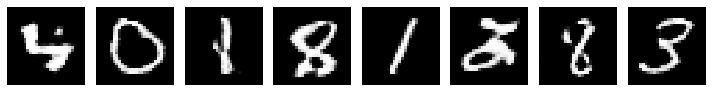

Epoch: 40
Time for epoch 40 is 38.7544379234314 sec


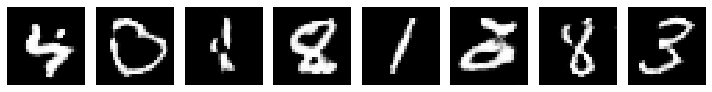

Epoch: 50
Time for epoch 50 is 38.75714468955994 sec


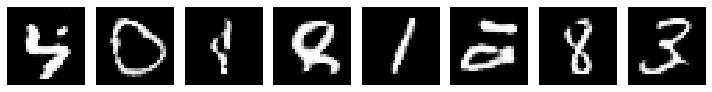

Epoch: 60
Time for epoch 60 is 38.63727617263794 sec


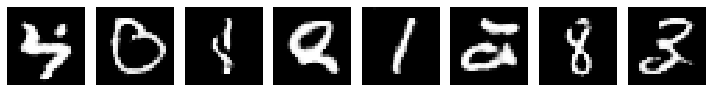

Epoch: 70
Time for epoch 70 is 38.73535704612732 sec


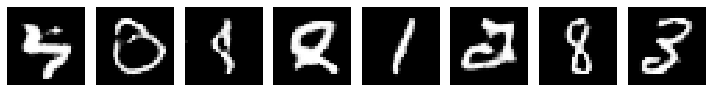

Epoch: 80
Time for epoch 80 is 38.62515687942505 sec


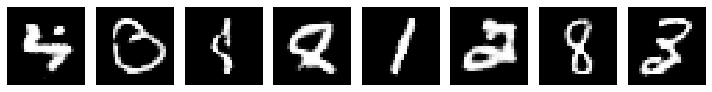

Epoch: 90
Time for epoch 90 is 38.58480143547058 sec


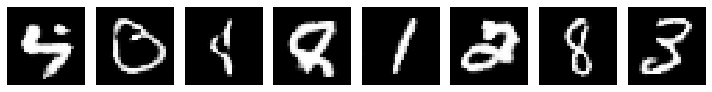

Epoch: 100
Time for epoch 100 is 38.72299861907959 sec


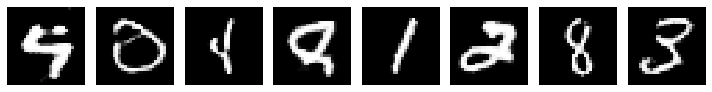

Epoch: 110
Time for epoch 110 is 38.75089621543884 sec


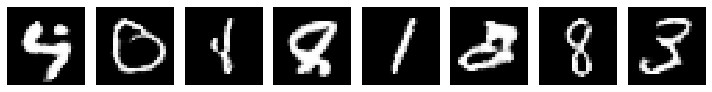

Epoch: 120
Time for epoch 120 is 38.71873092651367 sec


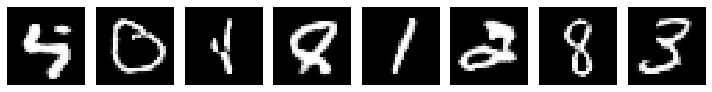

Epoch: 130
Time for epoch 130 is 38.55906891822815 sec


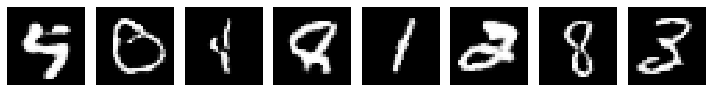

Epoch: 140
Time for epoch 140 is 38.753713846206665 sec


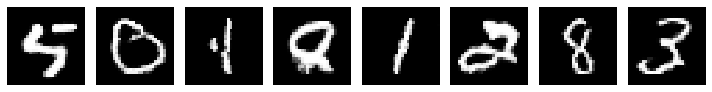

Epoch: 150
Time for epoch 150 is 38.54655718803406 sec


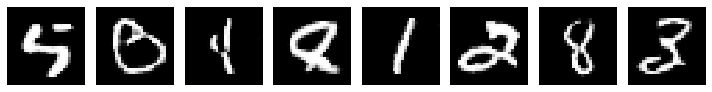

Epoch: 160
Time for epoch 160 is 38.5730242729187 sec


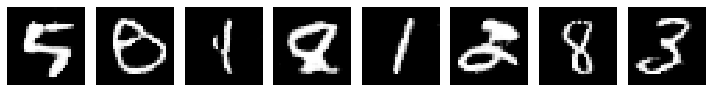

Epoch: 170
Time for epoch 170 is 38.536683320999146 sec


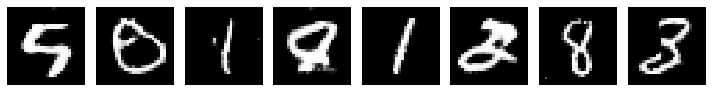

Epoch: 180
Time for epoch 180 is 38.596959590911865 sec


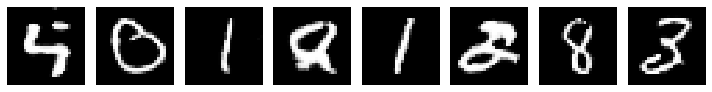

Epoch: 190
Time for epoch 190 is 38.65537977218628 sec


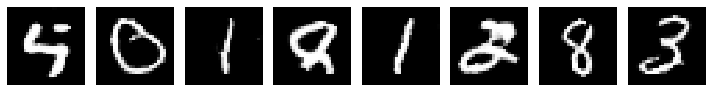

CPU times: user 18min 44s, sys: 5min 19s, total: 24min 3s
Wall time: 2h 9min 13s


In [0]:
%%time
train(train_dataset, EPOCHS)